In [1]:
import tensorflow as tf
print(tf.__version__)

2.12.0


In [2]:
#import basics librararies
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
dataset = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Implementation of ANN/Churn_Modelling.csv')
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
# Divide the dataset into dependent and independent
X = dataset.iloc[:,3:13]
y = dataset.iloc[:,13]

In [5]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [6]:
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

In [7]:
# Ferature Engineering
X_encoded = pd.get_dummies(X, columns=['Geography', 'Gender'], drop_first=True)

In [8]:
#concatenate these variable with datarame
X = pd.concat([X, X_encoded], axis=1)

In [9]:
X = X.drop(['Geography', 'Gender'], axis=1)

In [10]:
#test train spliting dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [11]:
#feature scaling
from sklearn.preprocessing import StandardScaler

In [12]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [13]:
X_train_scaled

array([[ 0.16958176, -0.46460796,  0.00666099, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-2.30455945,  0.30102557, -1.37744033, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-1.19119591, -0.94312892, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       ...,
       [ 0.9015152 , -0.36890377,  0.00666099, ..., -0.5698444 ,
        -0.57369368,  0.91601335],
       [-0.62420521, -0.08179119,  1.39076231, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-0.28401079,  0.87525072, -1.37744033, ...,  1.75486502,
        -0.57369368, -1.09168714]])

In [14]:
X_test_scaled

array([[-0.55204276, -0.36890377,  1.04473698, ...,  1.75486502,
        -0.57369368, -1.09168714],
       [-1.31490297,  0.10961719, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       [ 0.57162971,  0.30102557,  1.04473698, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       ...,
       [-0.74791227, -0.27319958, -1.37744033, ..., -0.5698444 ,
         1.74309049,  0.91601335],
       [-0.00566991, -0.46460796, -0.33936434, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-0.79945688, -0.84742473,  1.04473698, ...,  1.75486502,
        -0.57369368,  0.91601335]])

In [15]:
X_train_scaled.shape

(8000, 19)

In [16]:
#part 2 now lets ANN
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU,PReLU,ELU,ReLU
from tensorflow.keras.layers import Dropout

In [17]:
#### initailaizer ANN
classifier = Sequential()

In [20]:
#Add the input layer
classifier.add(Dense(units=11, activation='relu'))

In [21]:
#Add the hidden layer
classifier.add(Dense(units=7, activation='relu'))

In [22]:
#Add the 2nd hiden layer
classifier.add(Dense(units=6, activation='relu'))

In [23]:
#Add the output layer
classifier.add(Dense(1, activation='sigmoid'))

In [27]:
classifier.compile(opt , loss = "binary_crossentropy" , metrics=['accuracy'])

In [28]:
#if we provide own learning rate 
import tensorflow
opt = tensorflow.keras.optimizers.Adam(learning_rate=0.01)

In [30]:
#Early Stoping
import tensorflow as tf
early_stoping = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0,
)

In [31]:
model_history = classifier.fit(X_train_scaled , y_train , validation_split=0.33 , batch_size=10,epochs=1000 , callbacks=early_stoping)

Epoch 1/1000
536/536 [==============================] - 3s 5ms/step - loss: 0.3151 - accuracy: 0.8714 - val_loss: 0.3801 - val_accuracy: 0.8546
Epoch 2/1000
536/536 [==============================] - 3s 5ms/step - loss: 0.3133 - accuracy: 0.8740 - val_loss: 0.4005 - val_accuracy: 0.8538
Epoch 3/1000
536/536 [==============================] - 3s 6ms/step - loss: 0.3140 - accuracy: 0.8712 - val_loss: 0.3885 - val_accuracy: 0.8557
Epoch 4/1000
536/536 [==============================] - 3s 5ms/step - loss: 0.3167 - accuracy: 0.8733 - val_loss: 0.4105 - val_accuracy: 0.8535
Epoch 5/1000
536/536 [==============================] - 2s 5ms/step - loss: 0.3142 - accuracy: 0.8746 - val_loss: 0.3929 - val_accuracy: 0.8538
Epoch 6/1000
536/536 [==============================] - 2s 5ms/step - loss: 0.3189 - accuracy: 0.8739 - val_loss: 0.3760 - val_accuracy: 0.8497
Epoch 7/1000
536/536 [==============================] - 4s 7ms/step - loss: 0.3125 - accuracy: 0.8753 - val_loss: 0.4109 - val_accuracy:

In [32]:
model_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

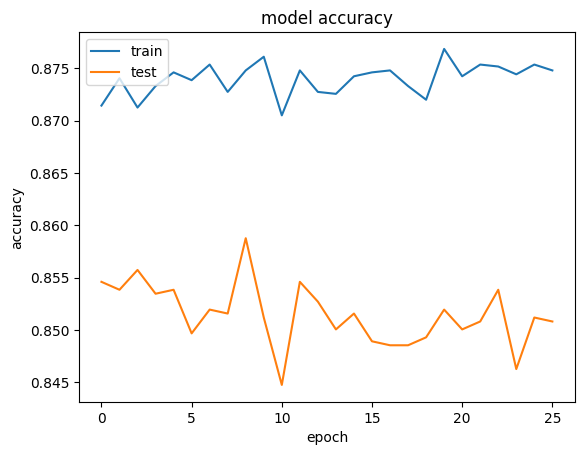

In [33]:
# summary history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train' , 'test'], loc='upper left')
plt.show()

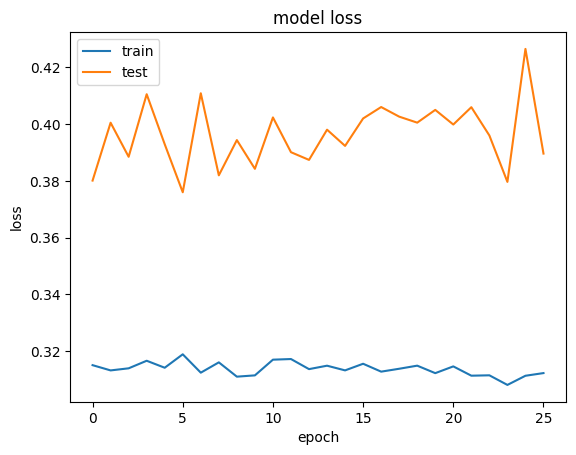

In [36]:
# summary history for accuracy
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train' , 'test'], loc='upper left')
plt.show()

In [37]:
y_pred = classifier.predict(X_test)
y_pred = (y_pred >= 0.5)

63/63 [==============================] - 0s 1ms/step


In [38]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)

In [39]:
cm

array([[1210,  385],
       [ 281,  124]])

In [41]:
from sklearn.metrics import accuracy_score
score = accuracy_score(y_pred,y_test)

In [42]:
score

0.667

In [44]:
#get weights
classifier.get_weights()

[array([[ 2.7248788e+00, -7.2549067e-02, -6.4512879e-01, -4.9550340e-02,
          3.0821592e-01, -8.9706767e-01, -1.5589271e-01,  7.0790201e-02,
         -3.3197671e-01, -4.2361632e-01,  3.4093365e-01],
        [-2.5783253e+00, -2.7091613e-01, -2.0333414e+00, -4.4656544e+00,
         -2.7787156e+00,  1.5474007e+00, -4.0619979e+00, -1.0105296e+00,
         -4.0496868e-01, -6.2840443e+00,  1.5963293e+00],
        [ 2.8188335e-02,  3.9185470e-01,  5.7183307e-01, -3.2419071e-01,
          3.3047855e-01, -1.0033586e+00, -1.3991661e+00, -1.6697112e-01,
         -9.6593127e-02,  6.2180810e-02, -1.9661908e+00],
        [-7.2950977e-01,  1.2451035e+00, -4.1460791e+00, -4.8330361e-03,
         -3.9175413e+00, -4.4617864e-01,  3.6952584e+00, -2.9949403e+00,
          5.3969324e-01, -5.7904929e-01,  2.1906121e+00],
        [-2.8209540e-01,  4.7058940e+00,  1.4515021e+00,  8.1651217e-01,
         -7.6054418e-01,  1.3953506e+00,  1.2503232e+00, -5.7231851e+00,
          3.8134391e+00,  1.8329066e-0